## Задача оптимизации параметров солнечной электростанции

Рассмотрим задачу оптимизации параметров солнечной электростанции с учетом различных технических и экономических факторов.

**Переменные решения:**
- x1: Угол наклона солнечных панелей (градусы)
- x2: Расстояние между рядами панелей (сантиметры)
- x3: Высота установки панелей (сантиметры)
- x4: Мощность инвертора (кВт)
- x5: Емкость аккумуляторных батарей (кВт*ч)
- x6: Площадь одной панели (м²)

**Критерии оптимизации:**
- $f_1(x) = 0.8x_4 + 0.6x_5 + 2x_6 \rightarrow min$ (стоимость системы)
- $f_2(x) = 0.3x_2 + 0.2x_3 + 0.2x_4 + 0.4x_6 \rightarrow min$ (затраты на обслуживание)
- $f_3(x) = 0.3x_1 + 0.4x_2 + 0.2x_3 \rightarrow min$ (влияние на окружающую среду)

**Ограничения:**
- $20 \leq x_1 \leq 80$ (допустимый угол наклона)
- $20 \leq x_2 \leq 80$ (минимальное и максимальное расстояние)
- $10 \leq x_3 \leq 40$ (ограничения по высоте)
- $10 \leq x_4 \leq 80$ (диапазон мощности)
- $20 \leq x_5 \leq 80$ (диапазон емкости)
- $10 \leq x_6 \leq 50$ (размер панели)

**Обоснование сортировки функций:**
- Стоимость системы (f1): Минимизация стоимости является приоритетной, так как это напрямую влияет на экономическую эффективность проекта.
- Затраты на обслуживание (f2): Минимизация затрат на обслуживание важна для долгосрочной экономии.
- Влияние на окружающую среду (f3): Минимизация влияния на окружающую среду важна для экологической устойчивости.



In [330]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [348]:
# Целевые функции
def f1(x):
    return 0.8 * x[3] + 0.6 * x[4] + 2 * x[5]

def f2(x):
    return 0.3 * x[1] + 0.2 * x[2] + 0.2 * x[3] + 0.4 * x[5]

def f3(x):
    return 0.3 * x[0] + 0.4 * x[1] + 0.2 * x[2]

# Ограничения
constraints = (
    {'type': 'ineq', 'fun': lambda x: x[0] - 20},
    {'type': 'ineq', 'fun': lambda x: 80 - x[0]},
    {'type': 'ineq', 'fun': lambda x: x[1] - 20},
    {'type': 'ineq', 'fun': lambda x: 80 - x[1]},
    {'type': 'ineq', 'fun': lambda x: x[2] - 10},
    {'type': 'ineq', 'fun': lambda x: 40 - x[2]},
    {'type': 'ineq', 'fun': lambda x: x[3] - 10},
    {'type': 'ineq', 'fun': lambda x: 80 - x[3]},
    {'type': 'ineq', 'fun': lambda x: x[4] - 20},
    {'type': 'ineq', 'fun': lambda x: 80 - x[4]},
    {'type': 'ineq', 'fun': lambda x: x[5] - 10},
    {'type': 'ineq', 'fun': lambda x: 50 - x[5]}
)

In [368]:
def sequential_concessions(concession):
    # Начальное приближение
    x0 = np.array([45, 25, 32, 16, 24, 48])
    
    # Решение для первой целевой функции (f1)
    res1 = minimize(f1, x0, constraints=constraints)
    f1_min = res1.fun
    
    constraints_new = constraints + ({'type': 'ineq', 'fun': lambda x: f1_min + concession - f1(x)},)
    res2 = minimize(f2, x0, constraints=constraints_new)
    f2_min = res2.fun
    
    # Добавление уступки для f3 и решение для четвертой целевой функции (f4)
    constraints_new = constraints_new + ({'type': 'ineq', 'fun': lambda x: f2_min + concession - f2(x)},)
    res3 = minimize(f3, x0, constraints=constraints_new)
    
    return res3.x

# Тестирование с разной величиной уступки
concessions = np.linspace(0, 29, 30)

# Вычисление значений целевых функций для каждой уступки
results = [sequential_concessions(c) for c in concessions]

f1_values = [f1(x) for x in results]
f2_values = [f2(x) for x in results]
f3_values = [f3(x) for x in results]

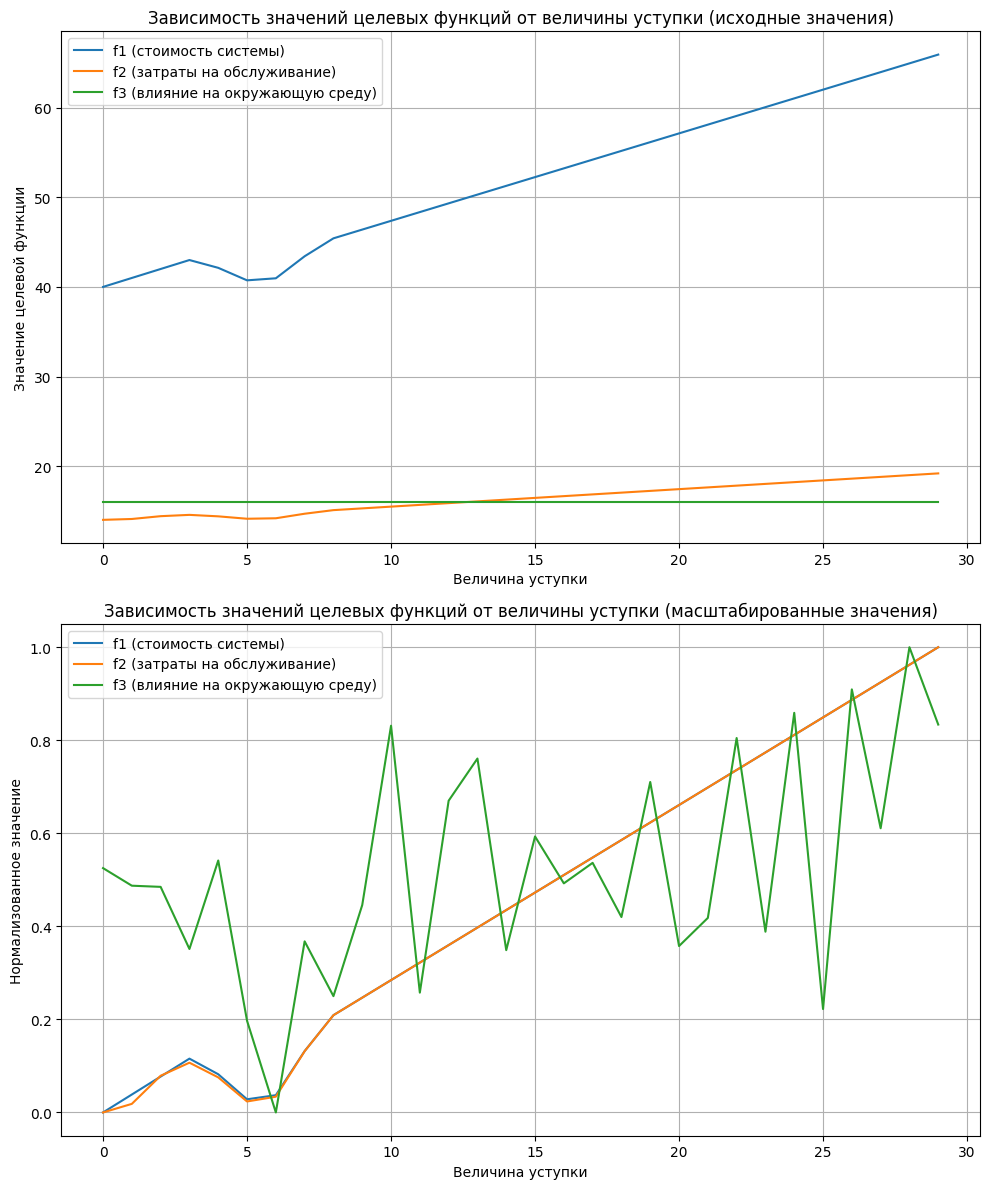

In [359]:
# Создание фигуры с двумя subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Первый график (исходные значения)
ax1.plot(concessions, f1_values, label='f1 (стоимость системы)')
ax1.plot(concessions, f2_values, label='f2 (затраты на обслуживание)')
ax1.plot(concessions, f3_values, label='f3 (влияние на окружающую среду)')
ax1.set_xlabel('Величина уступки')
ax1.set_ylabel('Значение целевой функции')
ax1.set_title('Зависимость значений целевых функций от величины уступки (исходные значения)')
ax1.legend()
ax1.grid()

# Второй график (масштабированные значения)
# Нормализация значений для лучшей визуализации
f1_norm = (f1_values - np.min(f1_values)) / (np.max(f1_values) - np.min(f1_values))
f2_norm = (f2_values - np.min(f2_values)) / (np.max(f2_values) - np.min(f2_values))
f3_norm = (f3_values - np.min(f3_values)) / (np.max(f3_values) - np.min(f3_values))

ax2.plot(concessions, f1_norm, label='f1 (стоимость системы)')
ax2.plot(concessions, f2_norm, label='f2 (затраты на обслуживание)')
ax2.plot(concessions, f3_norm, label='f3 (влияние на окружающую среду)')
ax2.set_xlabel('Величина уступки')
ax2.set_ylabel('Нормализованное значение')
ax2.set_title('Зависимость значений целевых функций от величины уступки (масштабированные значения)')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

In [451]:
x = np.array([123.2, 36.3, 29.9])

In [453]:
weights_list = [
    x + 15,
    x - 10,
    x * 2,
    x / 5,
    x ** 2,
    x,
]
weights_list

[array([138.2,  51.3,  44.9]),
 array([113.2,  26.3,  19.9]),
 array([246.4,  72.6,  59.8]),
 array([24.64,  7.26,  5.98]),
 array([15178.24,  1317.69,   894.01]),
 array([123.2,  36.3,  29.9])]

In [454]:
def weighted_sum(weights):
    # Начальное приближение
    x0 = np.array([45, 25, 32, 16, 24, 48])
    
    # Целевая функция как взвешенная сумма
    def objective(x):
        return weights[0] * f1(x) + weights[1] * f2(x) + weights[2] * f3(x)
    
    # Решение задачи оптимизации
    res = minimize(objective, x0, constraints=constraints)
    return res.x

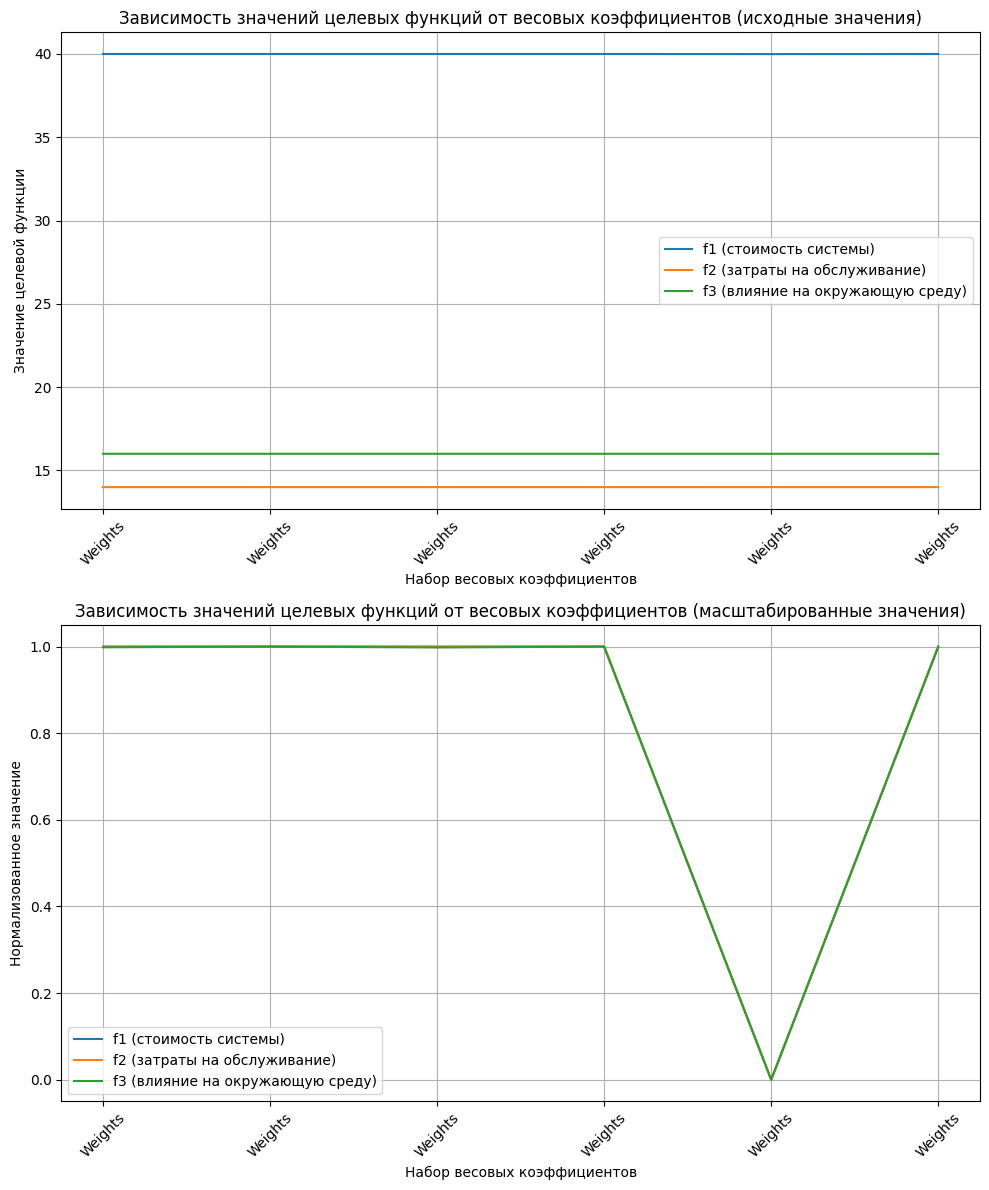

In [456]:
# Результаты для каждого набора весов
results_ws = [weighted_sum(w) for w in weights_list]

f1_values_ws = [f1(x) for x in results_ws]
f2_values_ws = [f2(x) for x in results_ws]
f3_values_ws = [f3(x) for x in results_ws]

# Создание фигуры с двумя subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Первый график (исходные значения)
ax1.plot(range(len(weights_list)), f1_values_ws, label='f1 (стоимость системы)')
ax1.plot(range(len(weights_list)), f2_values_ws, label='f2 (затраты на обслуживание)')
ax1.plot(range(len(weights_list)), f3_values_ws, label='f3 (влияние на окружающую среду)')
ax1.set_xlabel('Набор весовых коэффициентов')
ax1.set_ylabel('Значение целевой функции')
ax1.set_title('Зависимость значений целевых функций от весовых коэффициентов (исходные значения)')
ax1.set_xticks(range(len(weights_list)))
ax1.set_xticklabels([f'Weights' for w in weights_list], rotation=45)
ax1.legend()
ax1.grid()

# Второй график (масштабированные значения)
# Нормализация значений для лучшей визуализации
f1_norm_ws = (f1_values_ws - np.min(f1_values_ws)) / (np.max(f1_values_ws) - np.min(f1_values_ws))
f2_norm_ws = (f2_values_ws - np.min(f2_values_ws)) / (np.max(f2_values_ws) - np.min(f2_values_ws))
f3_norm_ws = (f3_values_ws - np.min(f3_values_ws)) / (np.max(f3_values_ws) - np.min(f3_values_ws))

ax2.plot(range(len(weights_list)), f1_norm_ws, label='f1 (стоимость системы)')
ax2.plot(range(len(weights_list)), f2_norm_ws, label='f2 (затраты на обслуживание)')
ax2.plot(range(len(weights_list)), f3_norm_ws, label='f3 (влияние на окружающую среду)')
ax2.set_xlabel('Набор весовых коэффициентов')
ax2.set_ylabel('Нормализованное значение')
ax2.set_title('Зависимость значений целевых функций от весовых коэффициентов (масштабированные значения)')
ax2.set_xticks(range(len(weights_list)))
ax2.set_xticklabels([f'Weights' for w in weights_list], rotation=45)
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

In [459]:
results_ws[0]

array([19.99999994, 19.99999997,  9.99999991,  9.99999995, 19.99999997,
        9.99999978])